# Derivation of digamma and trigamma implementations

@fritzo 2017-12-30

In [1]:
from __future__ import division
import math
import numpy as np
from scipy.special import gammaln, digamma, polygamma
from matplotlib import pyplot
%matplotlib inline

In [2]:
x = np.arange(0.001, 5, 0.001)

Text(0.5,1,u'gammaln')

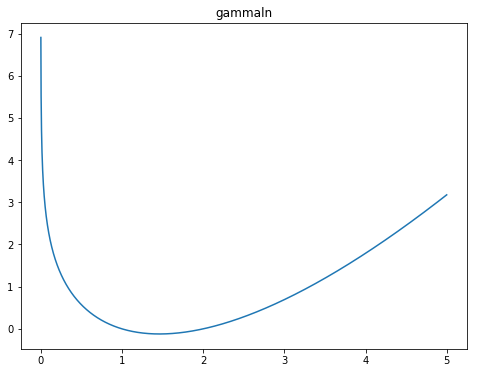

In [3]:
pyplot.figure(figsize=(8,6)).patch.set_color('white')
pyplot.plot(x, gammaln(x))
pyplot.title('gammaln')

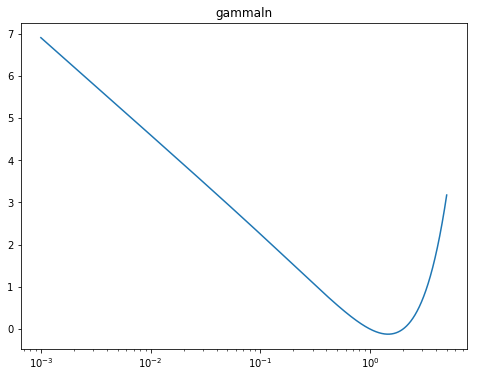

In [4]:
pyplot.figure(figsize=(8,6)).patch.set_color('white')
pyplot.plot(x, gammaln(x))
pyplot.title('gammaln')
pyplot.xscale('log')

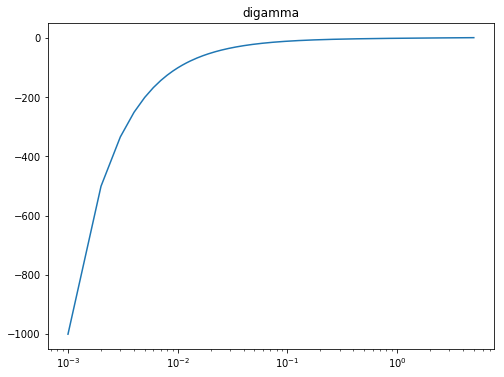

In [5]:
pyplot.figure(figsize=(8,6)).patch.set_color('white')
pyplot.plot(x, digamma(x))
pyplot.title('digamma')
pyplot.xscale('log')

In [6]:
def digamma_v1(x):
    eps = 1e-4 * x
    return (gammaln(x + eps) - gammaln(x - eps)) / (2 * eps)
def digamma_v2(x):
    return np.log(x) -1/(2*x) - 1/(12*x**2) + 1/(120*x**4) - 1/(252*x**6)
def digamma_n(x, n=3):
    if n == 0:
        return digamma_v2(x)
    return digamma_n(1 + x, n - 1) - 1/x
def digamma_v3(x):
    return digamma_n(x, 2)
def digamma_v4(x):
    return digamma_n(x, 3)
def digamma_c(x):
    """
    Implements Stirling's series. See NIST Handbook 5.11.2.
    """
    x = x.copy()
    result = np.zeros(x.shape)

    reflect = (x < 0.5)
    result[reflect] -= math.pi / np.tan(math.pi * x[reflect])
    x[reflect] *= -1
    x[reflect] += 1

    for i in range(4):
        result -= 1/x
        x += 1
    result += np.log(x) -1/(2*x) - 1/(12*x**2) + 1/(120*x**4) - 1/(252*x**6)
    return result

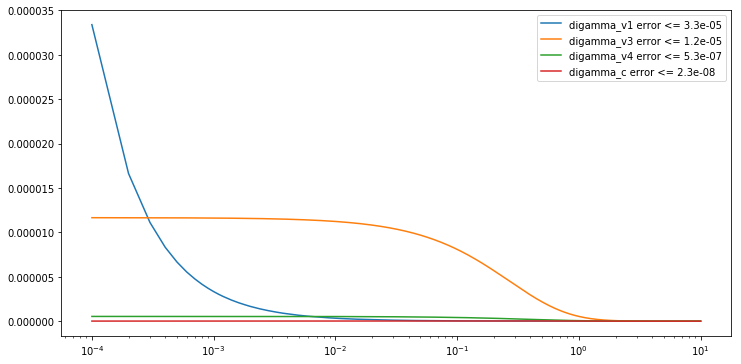

In [7]:
x = np.arange(0.0001, 10, 0.0001)
truth = digamma(x)
approximations = [digamma_v1, digamma_v3, digamma_v4, digamma_c]
pyplot.figure(figsize=(12,6)).patch.set_color('white')
for fn in approximations:
    actual = fn(x)
    error = np.abs(actual - truth)
    pyplot.plot(x, error, label='{} error <= {:0.2g}'.format(fn.__name__, error.max()))
pyplot.xscale('log')
pyplot.legend()

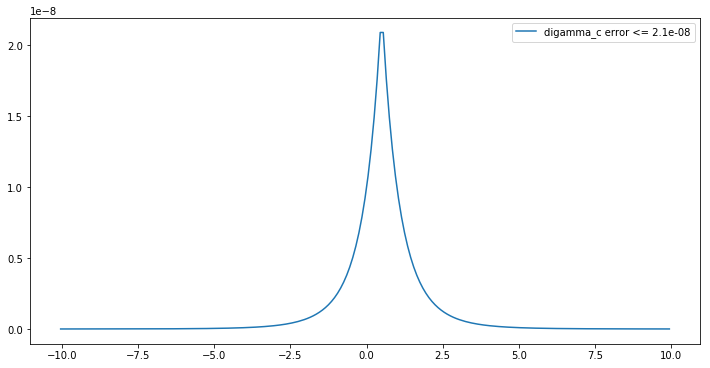

In [8]:
x = np.arange(-10.05, 10.05, 0.1)
truth = digamma(x)
approximations = [digamma_c]
pyplot.figure(figsize=(12,6)).patch.set_color('white')
for fn in approximations:
    actual = fn(x)
    error = np.abs(actual - truth)
    pyplot.plot(x, error, label='{} error <= {:0.2g}'.format(fn.__name__, error.max()))
pyplot.legend()

In [9]:
def trigamma_c(x):
    """
    Implements Stirling's series. See NIST Handbook 5.11.2.
    """
    x = x.copy()
    sign = np.ones(x.shape)
    result = np.zeros(x.shape)

    reflect = (x < 0.5)
    sign[reflect] *= -1
    result[reflect] -= (math.pi / np.sin(math.pi * x[reflect])) ** 2
    x[reflect] *= -1
    x[reflect] += 1

    for i in range(6):
        result += 1/(x*x)
        x += 1
    result += (1 + 1/(2*x) + 1/(6*x**2) + 1/(30*x**4) - 1/(42*x**6)) / x
    return sign * result

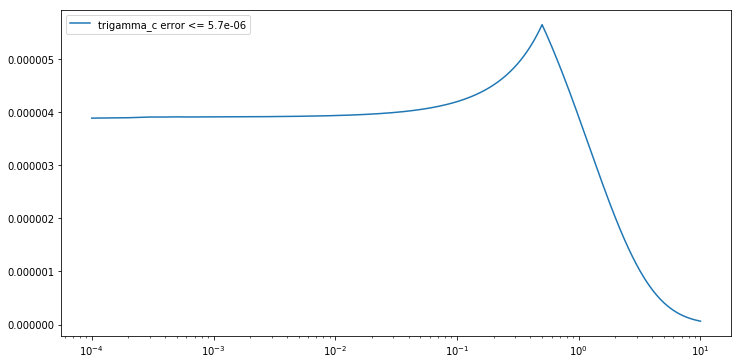

In [10]:
x = np.arange(0.0001, 10, 0.0001)
truth = polygamma(1, x)
approximations = [trigamma_c]
pyplot.figure(figsize=(12,6)).patch.set_color('white')
for fn in approximations:
    actual = fn(x)
    error = np.abs(actual - truth)
    pyplot.plot(x, error, label='{} error <= {:0.2g}'.format(fn.__name__, error.max()))
pyplot.xscale('log')
pyplot.legend()

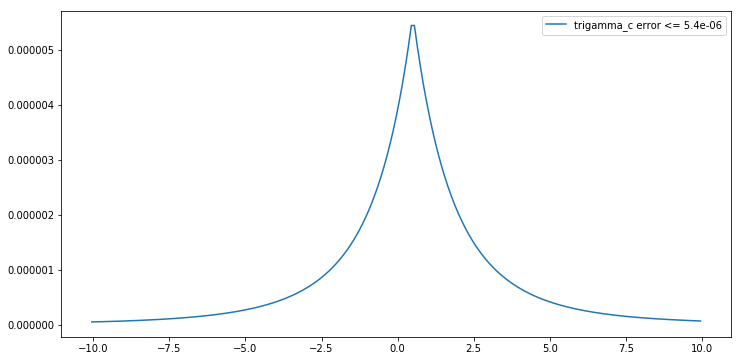

In [11]:
x = np.arange(-10.05, 10.05, 0.1)
truth = polygamma(1, x)
approximations = [trigamma_c]
pyplot.figure(figsize=(12,6)).patch.set_color('white')
for fn in approximations:
    actual = fn(x)
    error = np.abs(actual - truth)
    pyplot.plot(x, error, label='{} error <= {:0.2g}'.format(fn.__name__, error.max()))
pyplot.legend()